In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [125]:
tx_sent = pd.read_hdf('./data/processed/tx_sentiment_mean.hdf', key='df')
ca_sent = pd.read_hdf('./data/processed/ca_sentiment_mean.hdf', key='df')
ny_sent = pd.read_hdf('./data/processed/ny_sentiment_mean.hdf', key='df')
fl_sent = pd.read_hdf('./data/processed/fl_sentiment_mean.hdf', key='df')
ga_sent = pd.read_hdf('./data/processed/ga_sentiment_mean.hdf', key='df')

In [126]:
covid = pd.read_csv('./Covid_Data/time_series_covid19_confirmed_US.csv')

In [127]:
covidg = covid.groupby('Province_State').sum()

In [128]:
covidg = covidg.drop(['UID', 'code3', 'FIPS', 'Lat', 'Long_'], axis = 1)

In [129]:
tx_covid = covidg.loc['Texas',:]
ca_covid = covidg.loc['California',:]
ny_covid = covidg.loc['New York',:]
fl_covid = covidg.loc['Florida',:]
ga_covid = covidg.loc['Georgia',:]

In [130]:
tx_covid = pd.DataFrame(tx_covid)
tx_covid.index= pd.to_datetime(tx_covid.index)
ca_covid = pd.DataFrame(ca_covid)
ca_covid.index= pd.to_datetime(ca_covid.index)
ny_covid = pd.DataFrame(ny_covid)
ny_covid.index= pd.to_datetime(ny_covid.index)
fl_covid = pd.DataFrame(fl_covid)
fl_covid.index= pd.to_datetime(fl_covid.index)
ga_covid = pd.DataFrame(ga_covid)
ga_covid.index= pd.to_datetime(ga_covid.index)

In [131]:
tx = tx_covid.join(tx_sent, how = 'right')
ca = ca_covid.join(ca_sent, how = 'right')
ny = ny_covid.join(ny_sent, how = 'right')
fl = fl_covid.join(fl_sent, how = 'right')
ga = ga_covid.join(ga_sent, how = 'right')

In [200]:
shift = 1
roll = 3

In [201]:
tx['delta'] = tx['Texas']-tx['Texas'].shift(shift).rolling(roll).mean()
ca['delta'] = ca['California']-ca['California'].shift(shift).rolling(roll).mean()
ny['delta'] = ny['New York']-ny['New York'].shift(shift).rolling(roll).mean()
fl['delta'] = fl['Florida']-fl['Florida'].shift(shift).rolling(roll).mean()
ga['delta'] = ga['Georgia']-ga['Georgia'].shift(shift).rolling(roll).mean()
tx['delta_delta'] = tx['delta']-tx['delta'].shift(1)
ca['delta_delta'] = ca['delta']-ca['delta'].shift(1)
ny['delta_delta'] = ny['delta']-ny['delta'].shift(1)
fl['delta_delta'] = fl['delta']-fl['delta'].shift(1)
ga['delta_delta'] = ga['delta']-ga['delta'].shift(1)
tx['binary_delta'] =np.sign(tx['delta_delta'])
ca['binary_delta'] =np.sign(ca['delta_delta'])
ny['binary_delta'] =np.sign(ny['delta_delta'])
fl['binary_delta'] =np.sign(fl['delta_delta'])
ga['binary_delta'] =np.sign(ga['delta_delta'])

In [202]:
tx.dropna(inplace=True)
ca.dropna(inplace=True)
ny.dropna(inplace=True)
fl.dropna(inplace=True)
ga.dropna(inplace=True)

In [203]:
features = ['TB_polarity', 'TB_subjectivity']
X_tx = tx[features]
y_tx= tx['binary_delta']
X_tx_train, X_tx_test, y_tx_train, y_tx_test = train_test_split(X_tx, y_tx, random_state=42, shuffle = False)
X_ca = ca[features]
y_ca= ca['binary_delta']
X_ca_train, X_ca_test, y_ca_train, y_ca_test = train_test_split(X_ca, y_ca, random_state=42, shuffle = False)
X_ny = ny[features]
y_ny= ny['binary_delta']
X_ny_train, X_ny_test, y_ny_train, y_ny_test = train_test_split(X_ny, y_ny, random_state=42, shuffle = False)
X_fl = fl[features]
y_fl= fl['binary_delta']
X_fl_train, X_fl_test, y_fl_train, y_fl_test = train_test_split(X_fl, y_fl, random_state=42, shuffle = False)
X_ga = ga[features]
y_ga= ga['binary_delta']
X_ga_train, X_ga_test, y_ga_train, y_ga_test = train_test_split(X_ga, y_ga, random_state=42, shuffle = False)

In [204]:
tx_model = LogisticRegression().fit(X_tx_train, y_tx_train)
ca_model = LogisticRegression().fit(X_ca_train, y_ca_train)
ny_model = LogisticRegression().fit(X_ny_train, y_ny_train)
fl_model = LogisticRegression().fit(X_fl_train, y_fl_train)
ga_model = LogisticRegression().fit(X_ga_train, y_ga_train)

In [205]:
scores = []
scores.append(tx_model.score(X_tx_test, y_tx_test))
scores.append(ca_model.score(X_ca_test, y_ca_test))
scores.append(ny_model.score(X_ny_test, y_ny_test))
scores.append(fl_model.score(X_fl_test, y_fl_test))
scores.append(ga_model.score(X_ga_test, y_ga_test))
print(scores)

[0.47619047619047616, 0.2857142857142857, 0.5714285714285714, 0.45, 0.4444444444444444]


{'-1.0': {'precision': 0.7,
  'recall': 0.4117647058823529,
  'f1-score': 0.5185185185185185,
  'support': 17},
 '1.0': {'precision': 0.5833333333333334,
  'recall': 0.8235294117647058,
  'f1-score': 0.6829268292682927,
  'support': 17},
 'accuracy': 0.6176470588235294,
 'macro avg': {'precision': 0.6416666666666666,
  'recall': 0.6176470588235294,
  'f1-score': 0.6007226738934056,
  'support': 34},
 'weighted avg': {'precision': 0.6416666666666666,
  'recall': 0.6176470588235294,
  'f1-score': 0.6007226738934056,
  'support': 34}}

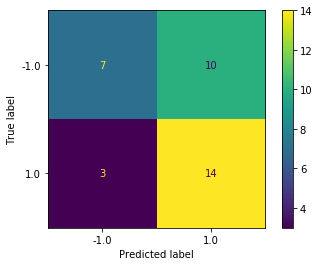

In [165]:
log_pred = fl_model.predict(X_fl_test)
plot_confusion_matrix(fl_model,X_fl_test,y_fl_test);
classification_report(y_fl_test,log_pred, output_dict=True)